# Name:Shreyas Chate

# Email:chateshreyas231@gmail.com

# VIRTUAL INTERNSHIP - DEEP LEARNING 

# CLASS 10 (BATCH-VSDL01)

**GOOGLE STOCK PRICE PREDICTION USING RNN ALGORITHM**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


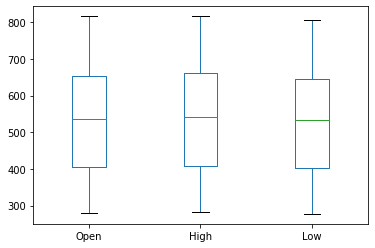

In [6]:
dataset_train.plot(kind="box")

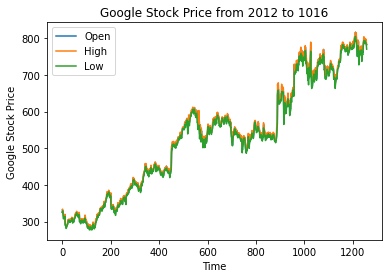

In [7]:
dataset_train.plot(kind="line")
plt.title('Google Stock Price from 2012 to 1016')
plt.xlabel('Time')
plt.ylabel('Google Stock Price') 
plt.legend()
plt.savefig('stock.png')

In [8]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [9]:
dataset_train.shape

(1258, 6)

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 40)

Epoch 1/100
30/30 [==============================] - 4s 117ms/step - loss: 0.0599
Epoch 2/100
30/30 [==============================] - 4s 128ms/step - loss: 0.0073
Epoch 3/100
30/30 [==============================] - 4s 124ms/step - loss: 0.0065
Epoch 4/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0057
Epoch 5/100
30/30 [==============================] - 3s 116ms/step - loss: 0.0045
Epoch 6/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0049
Epoch 7/100
30/30 [==============================] - 4s 120ms/step - loss: 0.0046
Epoch 8/100
30/30 [==============================] - 4s 117ms/step - loss: 0.0046
Epoch 9/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0045
Epoch 10/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0051
Epoch 11/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0044
Epoch 12/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0042
Epoch 13/100


In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

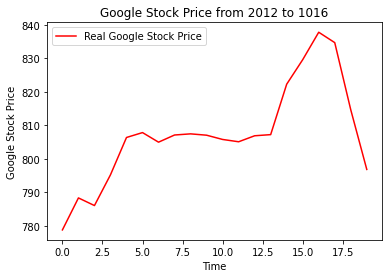

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.title('Google Stock Price from 2012 to 1016')
plt.xlabel('Time')
plt.ylabel('Google Stock Price') 
plt.legend()
plt.show()

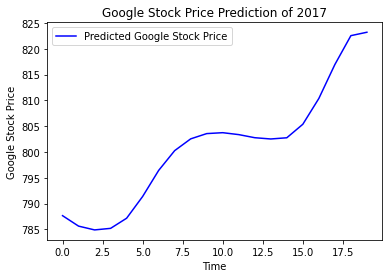

In [18]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction of 2017')
plt.xlabel('Time')
plt.ylabel('Google Stock Price') 
plt.legend()
plt.show()

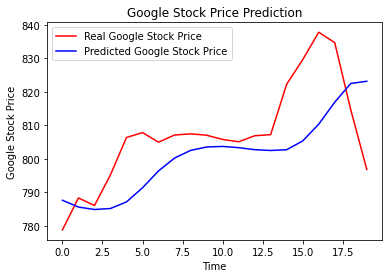

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price') 
plt.legend()
plt.show()